In [17]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('HousingData (1).csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [8]:
df = df.fillna(df.mean())


<AxesSubplot:xlabel='RM', ylabel='MEDV'>

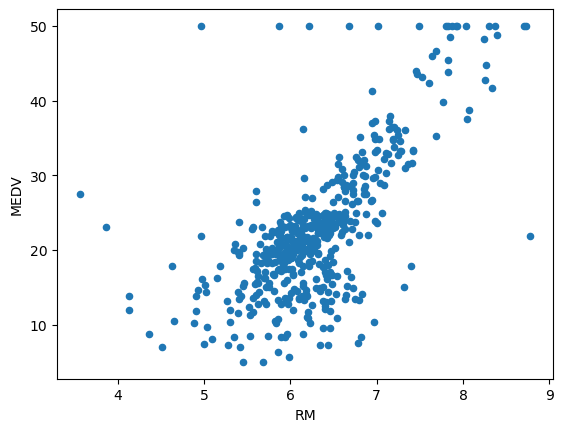

In [9]:
df.plot.scatter('RM','MEDV')

In [12]:
X, y = df.drop(['MEDV'], axis=1), df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
model = Sequential()

C:\Users\DELL\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 632.7144 - mae: 23.1754 - val_loss: 464.1004 - val_mae: 20.3732
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 579.8796 - mae: 21.9994 - val_loss: 406.8497 - val_mae: 18.9463
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 490.8021 - mae: 20.0755 - val_loss: 307.0538 - val_mae: 16.2726
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 365.6577 - mae: 17.0724 - val_loss: 158.3722 - val_mae: 11.8586
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 219.0932 - mae: 12.4514 - val_loss: 43.3041 - val_mae: 4.9091
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 71.5531 - mae: 6.7695 - val_loss: 57.4283 - val_mae: 5.9183
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 63.6174 - mae: 6.1331 - val_loss: 27.8152 - val_mae: 4.5293
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 45.8114 - mae: 4.9870 - val_loss: 18.6920 - val_mae: 3.5146
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/st

Text(0, 0.5, 'Predicted Y')

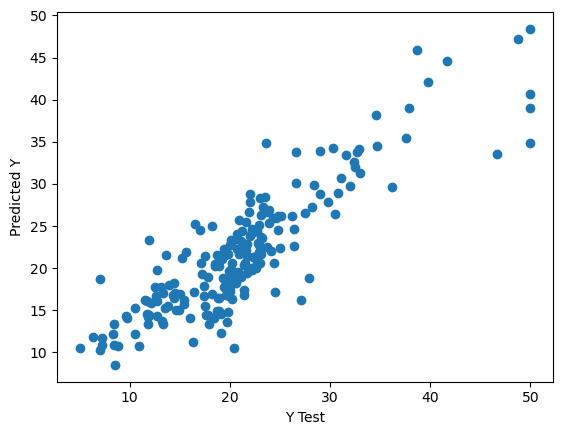

In [14]:
from tensorflow.keras.layers import Dense
model.add(Dense(units=128, activation='relu', input_shape=(13,)))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 32, activation='relu'))
model.add(Dense(units = 16, activation='relu'))
model.add(Dense(1))
model.summary()
model.compile(optimizer = 'adam', loss='mean_squared_error', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=15, verbose=1, validation_split=0.05)
#Evaluation of the model
y_pred = model.predict(X_test)
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean absolute error on test data using NN: ', mae_nn)
print('Mean squared error on test data using NN: ', mse_nn)
print('RMSE using NN:', np.sqrt(mse_nn))

plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')